In [ ]:
!pip install requests beautifulsoup4
!pip install firebase
import requests
from bs4 import BeautifulSoup

def fetch_page(url):
 response = requests.get(url)
 if response.status_code == 200:
  soup = BeautifulSoup(response.text, 'html.parser')
  return soup
 else:
  return None


In [ ]:
import re
def index_words(soup):
  index = {}
  words = re.findall(r'\w+', soup.get_text())
  for word in words:
    word = word.lower()
    if word in index:
      index[word] += 1
    else:
      index[word] = 1
  return index

In [ ]:
def remove_stop_words(index):
  stop_words = {'a', 'an', 'the', 'and', 'or',     				'in', 'on', 'at'}
  for stop_word in stop_words:
    if stop_word in index:
      del index[stop_word]
  return index

In [ ]:
from nltk.stem import PorterStemmer
def apply_stemming(index):
  stemmer = PorterStemmer()
  stemmed_index = {}
  for word, count in index.items():
    stemmed_word = stemmer.stem(word)
    if stemmed_word in stemmed_index:
      stemmed_index[stemmed_word] += count
    else:
      stemmed_index[stemmed_word] = count
  return stemmed_index

In [ ]:
def search(query, index):
  query_words = re.findall(r'\w+', query.lower())
  results = {}
  for word in query_words:
    if word in index:
      results[word] = index[word]
  return results

In [ ]:
def search_engine(url, query):
  soup = fetch_page(url)
  if soup is None:
     return None
  index = index_words(soup)
  index = remove_stop_words(index)
  index = apply_stemming(index)
  results = search(query, index)
  return results

In [ ]:
url = 'https://www.arianagrande.com/'
query = 'Ariana'
results = search_engine(url, query)
print(results)

{'ariana': 6}


In [ ]:
url = 'https://en.wikipedia.org/wiki/Bird'
query = 'bird'
results = search_engine(url, query)
print(results)

{'bird': 574}


In [ ]:
url = 'https://en.wikipedia.org/wiki/Bird'
query = 'birds wings'
results = search_engine(url, query)
print(results)

{}


In [ ]:
def search(query, index):
  stemmer = PorterStemmer()
  query_words = re.findall(r'\w+', query.lower())
  results = {}
  for word in query_words:
    word = stemmer.stem(word)
    if word in index:
      results[word] = index[word]
  return results

In [ ]:
url = 'https://en.wikipedia.org/wiki/Bird'
query = 'birds wings'
results = search_engine(url, query)
print(results)

{'bird': 574, 'wing': 25}


In [ ]:
rank=1
for word, count in results.items():
 rank = rank*1/count
rank = 1-rank


In [ ]:
url = 'https://www.arianagrande.com/'
query = 'shop buy ariana music grande video eternal sunshine brighter days'
results = search_engine(url, query)
print(results)

{'shop': 1, 'buy': 6, 'ariana': 6, 'music': 12, 'grand': 4, 'video': 3, 'etern': 4, 'sunshin': 4, 'brighter': 6, 'day': 6}


{'shop': 1, 'buy': 6, 'ariana': 6, 'music': 12, 'grand': 4, 'video': 3, 'etern': 4, 'sunshin': 4, 'brighter': 6, 'day': 6}
0.9999996651020233


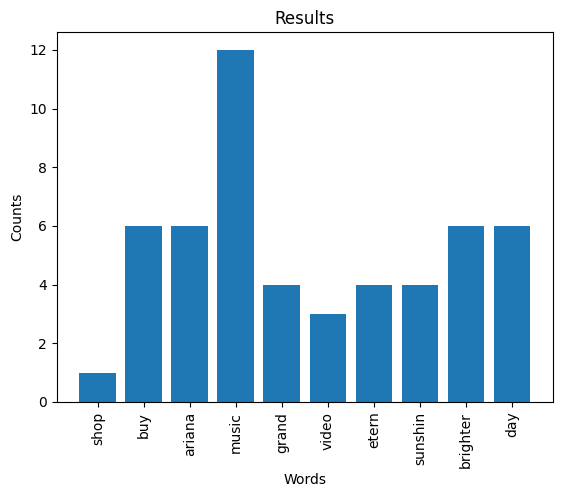

In [ ]:
from firebase import firebase
queries = 'shop buy ariana music grande video eternal sunshine brighter days'
db_link = "https://cloud7-38a0b-default-rtdb.firebaseio.com/"
FBconn = firebase.FirebaseApplication(db_link,None)
results = search_engine(url, queries)
print(results)

#add the results dictionary to the FB database
FBconn.put('/','results',results)
rank=1
for word, count in results.items():
  rank = rank*1/count
rank = 1-rank
print(rank)

# create a bar chart showing the number of appearences of each of the 10 words with set spacing between the words to make it readable
import matplotlib.pyplot as plt
words = list(results.keys())
counts = list(results.values())
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Results')
plt.show()